In [3]:
#Common Imports
import ipywidgets as widgets
import sys
sys.path.append('./Commons')
import find_directory
import find_fileName


# Feature Extraction

The following section will depict the steps to extract features from videos. This feature extraction will be performed using v-iashin feature extraction which can be found https://github.com/v-iashin/video_features .

## Prerequisites 
1. Store the videos that you wish to extract features from in the folder Data/Videos_MP4

## Create a Txt File containing all the video names

This cell will create a txt file based on all the video names within the Data/Videos_MP4 folder. This txt file will be used in the feature extraction step.

In [1]:
from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir("../Data/Videos_mp4") if isfile(join("../Data/Videos_mp4", f))]
with open('../Data/Videos_mp4/video_name.txt', 'w') as f:

    for name in onlyfiles:
        name = "../../../Data/Videos_mp4/" + name
        f.write(name)
        f.write('\n')
f.close()

In [3]:
%cd ./FeatureExtraction/video_features

C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder\Codes\FeatureExtraction\video_features


## Select the type of stream for feature extraction

Available values are RGB, Flow and null.


Null means that the stream will be default which will be RGB+Flow

In [4]:
stream = widgets.Dropdown(
    options=['rgb', 'flow', 'null'],
    value='rgb',
    description='Stream:',
    disabled=False,
)
display(stream)

Dropdown(description='Stream:', options=('rgb', 'flow', 'null'), value='rgb')


## Feature Extraction

The following cell will perform the feature extraction.

### Prerequisites
1. Ensure that the folder "ExtractedFeatures" exist in the path of "Codes/TSU/Toyota_Smarthome/pipline"

In [6]:
chosen_stream = stream.value
%run main.py feature_type="i3d" device="cuda:0" file_with_video_paths="../../../Data/Videos_mp4/video_name.txt" output_path="../../../Codes/TSU/Toyota_Smarthome/pipline/ExtractedFeatures" on_extraction=save_numpy streams=$chosen_stream 

hit
['i3d']
../../../Codes/TSU/Toyota_Smarthome/pipline/Testing\i3d
feature_type: i3d
stack_size: 64
step_size: 64
streams: rgb
flow_type: pwc
extraction_fps: null
device: cuda:0
on_extraction: save_numpy
output_path: ../../../Codes/TSU/Toyota_Smarthome/pipline/Testing\i3d
tmp_path: ./tmp\i3d
keep_tmp_files: false
show_pred: false
config: null
video_paths: null
file_with_video_paths: ../../../Data/Videos_mp4/video_name.txt

Saving features to ../../../Codes/TSU/Toyota_Smarthome/pipline/Testing\i3d
Device: cuda:0
hit
The number of specified videos: 26


  0%|                                                                                           | 0/26 [00:16<?, ?it/s]


KeyboardInterrupt: 

In [7]:
%cd ../../

C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder


# Training Model (TSU)

The following cells will depict the training of the model through the use of the Extracted Features completed previously. For further details, each cell will explain its functionality and purpose.

## Imports

The following cell will import the various libraries required by the training of model. If there is any libraries that is not installed. Please install into the virtual environment to ensure that the training of model is able to run successfully.

In [1]:
# @title Run this!!
from os import listdir
from os.path import isfile, join
import csv
import os
import shutil
from shutil import SameFileError
import json
from pathlib import Path
import torch

In [2]:
%cd ./TSU/Toyota_Smarthome/pipline

C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline


## Curating the Extracted Features

The following cell will curate the Extracted Features into Features that the training requires.

Requirements:
1. Ensure that the Feature Extraction is completed **OR** Features are stored in the "ExtractedFeatures" folder in "Codes/TSU/Toyota_Smarthome/pipline"
2. Ensure that the folder named = "CuratedExtractedFeatures" exist in the directory "Codes/TSU/Toyota_Smarthome/pipline"
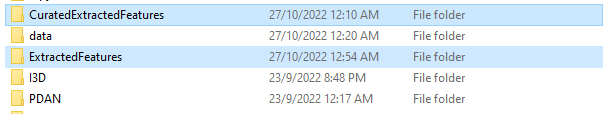

In [11]:
onlyfiles = [f for f in listdir("./ExtractedFeatures/i3d/") if isfile(join("./ExtractedFeatures/i3d/", f))]

f2 = open("./data/smarthome_CS_51.json")
data = json.load(f2)

diction = {}
RGBCount = 0

for i in onlyfiles:
  if i.__contains__("_rgb"):
    j = i.replace("_rgb","")
    shutil.copyfile("./ExtractedFeatures/i3d/"+i, "./CuratedExtractedFeatures/"+j)
    j = j.replace(".npy","")
    diction[j] = data.get(j)
    RGBCount += 1
print("Total RGB files extracted: " + str(RGBCount))
f2.close()

Total RGB files extracted: 536


## Compiling the Curated Extracted Features into a JSON 

The following cell will compile the curated features into a JSON object for training purposes.
1. Ensure that the folder named = "CuratedFeatures" exist in the directory "Codes/TSU/Toyota_Smarthome/pipline"
2. Ensure that the folder named = "data" exist in the directory "Codes/TSU/Toyota_Smarthome/pipline"

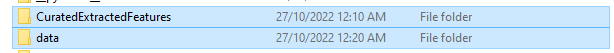

In [12]:
with open('./data/smarthome_CS_32.json', 'w', encoding='utf-8') as f:
    json.dump(diction, f, ensure_ascii=False)
print("Smarthome_CS_32.json has been generated")

Smarthome_CS_32.json has been generated


## Selecting the variables


The following cell will require the user to select the specific value for training of the model.
1. Ensure that the folder named = "TrainedModel" exist in the current directory of the notebook and it is empty.
<br></br>

2. Mode {Unique Values}
	1. **There is 4 different modes RGB, FLOW, RGB+FLOW or FLOW+RGB**
<br></br>

3. Train {Boolean}
	1. **Determine if this is a training or testing.**
<br></br>

4. Epoch {Int}
	1.  **Defined as the total number of iterations of all the training data in one cycle for training the machine learning model.**
<br></br>

5. Batch Size {Int}
	1. **Defined as the number of training examples utilized in one iteration.**
<br></br>

6. Output {Folder}
	1. **This is the path of the output folder.**
<br></br>

In [5]:
#Display Train Dropdown Menu
Train = widgets.Dropdown(
    options=[True, False],
    value=True,
    description='Train:',
    disabled=False,
)
display(Train)

#Display Mode Dropdown Menu
Mode = widgets.Dropdown(
    options=['rgb', 'flow', 'flow+rgb', 'rgb+flow'],
    value='rgb',
    description='Mode:',
    disabled=False,
)
display(Mode)

#Display Epoch Dropdown Menu
epoch = widgets.IntText(
    value=140,
    description='Epoch:',
    disabled=False
)
display(epoch)

#Display Batch Size Dropdown Menu
batchsize = widgets.IntText(
    value=1,
    description='Batch Size:',
    disabled=False
)
display(batchsize)



Dropdown(description='Train:', options=(True, False), value=True)

Dropdown(description='Mode:', options=('rgb', 'flow', 'flow+rgb', 'rgb+flow'), value='rgb')

IntText(value=140, description='Epoch:')

IntText(value=1, description='Batch Size:')


## Select the output Path

The following cell requires the user to pick the folder where they want to store the trained model at.

In [9]:
trainingOutputFile = find_directory.gui_fdir()
trainingOutputFile = trainingOutputFile.decode("utf-8")
print(trainingOutputFile)

C:/SIT/3104/ICT3104Project/ict3104-team09-2022-binder/Codes/TSU/Toyota_Smarthome/pipline/Testing


## Training the Model

The following cell will trained the model based on the variables that the user has selected previous.

In [3]:
%run ./train.py \
-dataset TSU \
-mode $Mode.value \
-split_setting CS \
-model PDAN \
-train $Train.value \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch $epoch.value \
-batch_size $batchsize.value \
-comp_info TSU_CS_RGB_PDAN \
-load_model ./PreTrainedModel/PDAN_TSU_RGB\
-rgb_root ./CuratedExtractedFeatures \
-featurePath ./data/smarthome_CS_32.json \
-outputTrain $trainingOutputFile

usage: train.py [-h] [-mode MODE] [-train TRAIN] [-comp_info COMP_INFO] [-rgb_model_file RGB_MODEL_FILE]
                [-flow_model_file FLOW_MODEL_FILE] [-gpu GPU] [-dataset DATASET] [-rgb_root RGB_ROOT]
                [-flow_root FLOW_ROOT] [-type TYPE] [-lr LR] [-epoch EPOCH] [-model MODEL] [-APtype APTYPE]
                [-randomseed RANDOMSEED] [-load_model LOAD_MODEL] [-num_channel NUM_CHANNEL] [-batch_size BATCH_SIZE]
                [-kernelsize KERNELSIZE] [-feat FEAT] [-split_setting SPLIT_SETTING] [-featurePath FEATUREPATH]
                [-outputTrain OUTPUTTRAIN]
train.py: error: argument -train: Boolean value expected.


AssertionError: 

In [4]:
%run test.py \
-dataset TSU \
-mode rgb \
-split_setting CS \
-model PDAN \
-train False \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch 5 \
-batch_size 2 \
-comp_info TSU_CS_RGB_PDAN \
-load_model ./PreTrainedModel/PDAN_TSU_RGB \
-rgb_root ./Data/smarthome_CS_32.json \
-featurePath ./CuratedExtractedFeatures\
-outputTest ./EvaluateModel 

Random_SEED!!!: 0
PDAN
batch_size: 2
cuda_avail True
RGB mode ./CuratedExtractedFeatures


100%|███████████████████████████████████████████████████████████████████████████████| 536/536 [00:01<00:00, 364.30it/s]
C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\models.py:88: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.key_conv.weight, mode='fan_out')
C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\models.py:89: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.value_conv.weight, mode='fan_out')
C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\models.py:90: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.query_conv.weight, mode='fan_out')
C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\models.py:91: UserWarning

you are processing PDAN
loaded ./PreTrainedModel/PDAN_TSU_RGB
pytorch_total_params 5804083
num_channel: 512 input_channnel: 1024 num_classes: 51
0.0002


C:\Users\Ivan\anaconda3\envs\ICT3104Project\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Ivan\anaconda3\envs\ICT3104Project\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\apmeter.py:108: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  rg = torch.range(1, self.scores.size(0)).float()
C:\SIT\3104\ICT3104Project\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\apmeter.py:137: UserWarning: indexing with dtype torch.uint8 is now d

val-map: tensor(9.5973)
tensor([3.2199e+00, 1.0785e+01, 1.2328e+01, 9.1447e+00, 2.1682e+00, 5.7915e+00,
        9.3170e-01, 8.2743e+00, 1.8958e+00, 2.7897e+00, 2.1160e+00, 5.1676e-01,
        1.8740e-01, 4.4605e+00, 3.7877e+00, 1.5258e+00, 1.1797e+00, 1.9205e+01,
        1.0077e+00, 4.0459e+01, 1.3885e+00, 2.1411e+01, 4.1378e+01, 2.1046e+00,
        2.0134e-01, 4.9950e+00, 1.7670e+01, 6.3112e+00, 5.0593e+00, 1.1576e+00,
        7.1838e-01, 1.3850e-02, 8.1936e+00, 5.9331e-01, 2.5791e+01, 7.0868e+01,
        8.1375e+00, 4.1458e+00, 1.3837e+01, 2.4140e+00, 2.0800e+01, 4.7617e+00,
        1.5222e+01, 4.8041e+01, 1.9522e-01, 6.2876e+00, 5.6130e+00, 1.3672e+01,
        6.2554e+00, 3.7349e-01, 7.5355e-02])
Evaluation Done. You can find the result in ./EvaluateModel/Evaluation.csv


# Video Inference 

The following section will depict the steps taken to perform the video Inference for TSU.

## Limitations
1. The video inference can only be performed one at a time. Hence user have to select the video that they wish to perform inference on. 


## Select the specific video

The following cells requires the user to pick the specific video that they want to do inference on

In [12]:
videoPath = find_fileName.gui_fname("../../../../Data/Videos_mp4")
videoPath = videoPath.decode("utf-8")
# print(videoPath)

videoInput = videoPath.split('/')
videoInput = videoInput[-1]
print(videoInput)

P02T02C03.mp4



## Select the output Path

The following cell requires the user to pick the folder where they want to store the completed video inference at. 

There will be a folder named "InferencedVideos" available for users to store their videos if they wished to.

In [13]:
filePathInput = find_directory.gui_fdir()
filePathInput = filePathInput.decode("utf-8")
print(filePathInput)

C:/SIT/3104/ICT3104Project/ict3104-team09-2022-binder/Codes/TSU/Toyota_Smarthome/pipline/InferencedVideos


## Video Inference Step

The following cell will run the video inference for TSU.

**Please ensure that you have completed the previous two steps to select the specific video and the output path.**

In [14]:
%run inference.py \
-dataset TSU \
-mode rgb \
-split_setting CS \
-model PDAN \
-train False \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch 5 \
-batch_size 2 \
-comp_info TSU_CS_RGB_PDAN \
-load_model ./PreTrainedModel/PDAN_TSU_RGB \
-rgb_root ./data/smarthome_CS_51.json \
-featurePath ./CuratedExtractedFeatures \
-VideoInputTest $videoInput \
-video_path $videoPath \
-annotations ./Annotation \
-filepath $filePathInput

Random_SEED!!!: 0
PDAN
batch_size: 2
cuda_avail True
File name:  P02T02C03
FilePath:  C:/SIT/3104/ICT3104Project/ict3104-team09-2022-binder/Data/Videos_mp4/P02T02C03.mp4
Pre-trained Model:  PDAN
Model is Loaded ./PreTrainedModel/PDAN_TSU_RGB
RGB mode ./CuratedExtractedFeatures


100%|███████████████████████████████████████████████████████████████████████████████| 536/536 [00:02<00:00, 247.86it/s]


you are processing PDAN
loaded ./PreTrainedModel/PDAN_TSU_RGB
pytorch_total_params 5804083
num_channel: 512 input_channnel: 1024 num_classes: 51
0.0002


AttributeError: module '__main__' has no attribute '__spec__'